# Star Wars survey: an insight into viewers preference and opinion

Almost everyone has seen a Star Wars movie, the viewer spectrum goes from "OMG I wish this was real" to "Eew I just hate anything associated with geek culture". So, across this sea of opinions there are many questions to be answered in order to give some insight into how this multi-billion dollar franchise is perceived and consumed by the general public.

With this project we'll try to extract as much information as we can from the data, with the main objective of finding a general profile for the ideal star wars fan.

The dataset we'll be using is a survey made by [FiveThirtyEight](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv) before the premiere of the sequel trilogy first movie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading the data and dysplaying the row names
star_wars = pd.read_csv('star_wars.csv', encoding="ISO-8859-1")
print(star_wars.columns)
print(star_wars['RespondentID'].isnull().value_counts())
star_wars.head()

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


After inspecting the names of the columns que notice that there are some confusing columns i.e. 'Unnamed: X'. This columns are the answer to the question asked in the previous column. This format derives from having a multiple choice answer type.

There's also a null respondent ID, examining the dataset we can see that this row works as a legend for the entire survey so we will eliminate it in the next section. Also, we'll analyze how many null values are in each column an drop whichever has more than 80% of null values

## Cleaning the data

In [2]:
#Removing null RespondentID row
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

#Evaluating null values
for col in star_wars.columns:
    null_sum = round((star_wars[col].isnull().sum()/1186) * 100, 2)
    print(col,':', null_sum)

RespondentID : 0.0
Have you seen any of the 6 films in the Star Wars franchise? : 0.0
Do you consider yourself to be a fan of the Star Wars film franchise? : 29.51
Which of the following Star Wars films have you seen? Please select all that apply. : 43.25
Unnamed: 4 : 51.85
Unnamed: 5 : 53.63
Unnamed: 6 : 48.82
Unnamed: 7 : 36.09
Unnamed: 8 : 37.77
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. : 29.6
Unnamed: 10 : 29.51
Unnamed: 11 : 29.6
Unnamed: 12 : 29.51
Unnamed: 13 : 29.51
Unnamed: 14 : 29.51
Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her. : 30.1
Unnamed: 16 : 29.93
Unnamed: 17 : 29.93
Unnamed: 18 : 30.61
Unnamed: 19 : 30.44
Unnamed: 20 : 31.37
Unnamed: 21 : 30.35
Unnamed: 22 : 30.86
Unnamed: 23 : 31.53
Unnamed: 24 : 30.27
Unnamed: 25 : 30.02
Unnamed: 26 : 30.78
Unnamed: 27 : 31.37
Unnamed: 28 : 30.35
Which character shot fi

As we can see, ``Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦`` has more than 80% null values, so we'll drop this column next.

In [3]:
star_wars.drop('Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦', axis=1, inplace=True)

Having eliminated the 'legend row' and the column with mostly null values we proceed to rename some answers. In order to have a more intuitive way to quantify answers to questions which responsse only have two outcomes, we'll transform the answers into True or False.

In [4]:
#Creating a map dictionary
yes_no = {"Yes": True,"No": False}

#Using the map function to convert the answers into True or False
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no, na_action=None)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no, na_action=None)
star_wars['Are you familiar with the Expanded Universe?'] = star_wars['Are you familiar with the Expanded Universe?'].map(yes_no, na_action=None)
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map(yes_no, na_action=None)

We now proceed to rename the answers referring to which movies the respondent have seen following the same logic as above.

In [5]:
#Creating a map dictionary
star_dict = {'Star Wars: Episode I  The Phantom Menace':True, 'Star Wars: Episode II  Attack of the Clones':True,
            'Star Wars: Episode III  Revenge of the Sith':True, 'Star Wars: Episode IV  A New Hope':True,
            'Star Wars: Episode V The Empire Strikes Back':True, 'Star Wars: Episode VI Return of the Jedi':True,
            np.nan:False}

#Using the map function to convert the answers into True or False
for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(star_dict)

Now we can rename the Unnamed: X columns to its correspondent movie.

In [6]:
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1', 
                             'Unnamed: 4':'seen_2','Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4',
                             'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'})

To determine which movies were preferred by the respondents, they were asked to rate from 1 to 6 their preferred movies, but on the dataset these numbers are a string, so we'll convert them into a float

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

We'll also rename the columns related to the question ``Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`` to better comunicate its content.

As the question above states, the scale used is inverted i.e the favorite movies have a lower score. This can create some confusion when first looking at the results, so we'll invert the scale to make it easier to understand them. We'll use the formula:

$$\text{scale minimum value} + \text{scale maximum value} - \text{value}_{i}$$

In [8]:
#Renaming ranking columns
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1', 
                             'Unnamed: 10':'ranking_2','Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4',
                             'Unnamed: 13':'ranking_5', 'Unnamed: 14':'ranking_6'})

#Inverting the ranking scale 
for col in star_wars.columns[9:15]:
    star_wars[col] = star_wars[col].apply(lambda x: 7 - x)

Now that the dataset is clean we can proceed to extract the information within it.

## Which is the most liked movie?

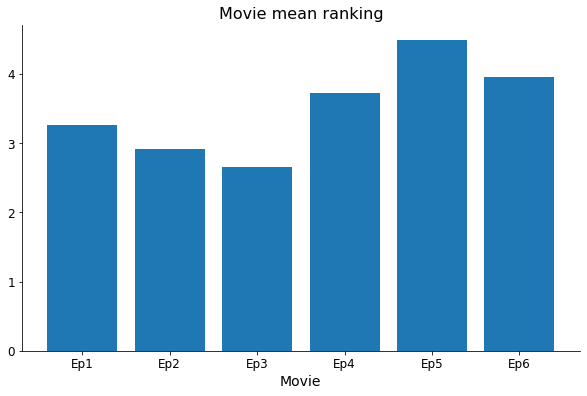

In [45]:
#defining a simple bar plot function
def simple_barplot(x, height, main_title, label):
    plt.figure(figsize=(10,6))
    plt.bar(x, height)
    plt.xlabel(label, size=14)
    plt.xticks(size=12)
    plt.yticks(size=12)
#     plt.ylim([0,5])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(main_title, size=16)
    plt.show();

#plotting the movies by ranking
simple_barplot(x=['Ep1', 'Ep2', 'Ep3', 'Ep4', 'Ep5', 'Ep6'], height=star_wars[star_wars.columns[9:15]].mean(), 
               main_title='Movie mean ranking', label='Movie')

It's clear that the original trilogy is far more liked than the prequel trilogy. Furthermore, the most liked movie is Episode 5: The Empire Strikes Back, while the less liked movie is Episode 3: Revenge of the Sith

## Which is the most seen movie?

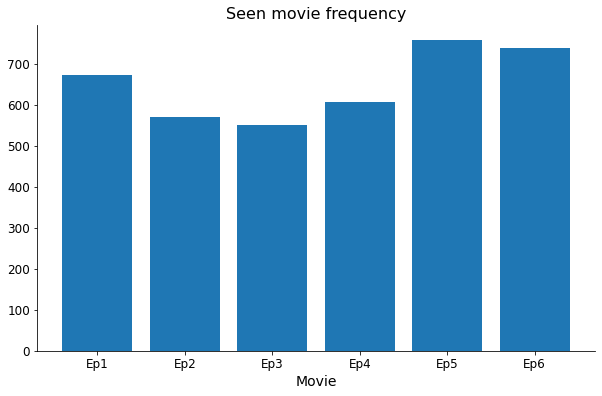

In [46]:
simple_barplot(['Ep1', 'Ep2', 'Ep3', 'Ep4', 'Ep5', 'Ep6'], star_wars[star_wars.columns[3:9]].sum(), 
               'Seen movie frequency', label='Movie')

The most seen movies are the original trilogy last 2 movies, with the first prequel following behind, this doesn't relate to its low popularity rating. One reason this may be explained by is: because it was the first of a new series of movies and it carried all the excitement of a new Star Wars film in 20 years, it attracted a lot of viewers expecting to witness the revival of the Star Wars universe.

## Popularity comparison between genders

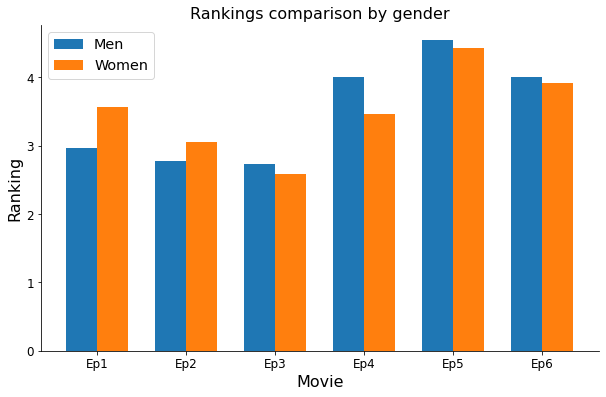

In [51]:
#Separating the data by gender
men = star_wars[star_wars["Gender"] == "Male"]
women = star_wars[star_wars["Gender"] == "Female"]

#Obtaining the mean rank for each movie
men_popular = men[men.columns[9:15]].mean()
women_popular = women[women.columns[9:15]].mean()

#defining a function to plot dual bar plots
def dual_barplot(bar1_data, label1, bar2_data, label2, x_label, y_label, main_title, xtickslabels):
    x = np.arange(len(xtickslabels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax1 = ax.bar(x - width/2, bar1_data, width, label=label1)
    ax2 = ax.bar(x + width/2, bar2_data, width, label=label2)
    
    ax.set_xticks(x)
    ax.set_xticklabels(xtickslabels, size=14)
    ax.set_xlabel(x_label,size=16)
    ax.set_ylabel(y_label,size=16)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(fontsize='x-large')
    ax.set_title(main_title, size=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()
    
labels = ['Ep1', 'Ep2', 'Ep3', 'Ep4', 'Ep5', 'Ep6']

dual_barplot(men_popular, 'Men', women_popular, 'Women', 'Movie', 'Ranking', 'Rankings comparison by gender', labels)

When we separate by gender we notice that popularity tendencies are the same across men and women. The original trilogy is more popular than the prequel trilogy. We can also highlight that women seemed to like more the prequel trilogy's first and second movie, while men seemed to like more the original trilogy's first movie. Further analysis is needed if we would like to determine if this difference is statistically significant.

## Seen movie comparison by gender

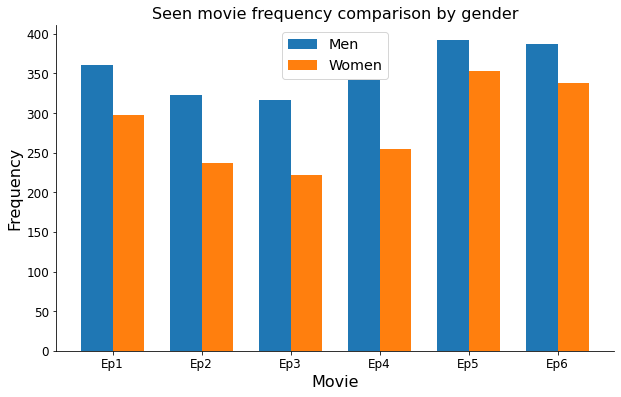

In [52]:
#obtaining the total times each movie was seen
men_popular = men[men.columns[3:9]].sum()
women_popular = women[women.columns[3:9]].sum()

dual_barplot(men_popular, 'Men', women_popular, 'Women', 'Movie', 'Frequency', 'Seen movie frequency comparison by gender', labels)

From this comparison is obvious that there was a significant difference between male and female respondents, and we can safely say that star wars movies are more popular between the men that participated in this survey. As for the tendencies, it remains the same for both genders, their most seen movies were Episode 5, Episode 6, and Episode 1 respectively.

## Taste comparison between Star Trek and non Star Trek fans

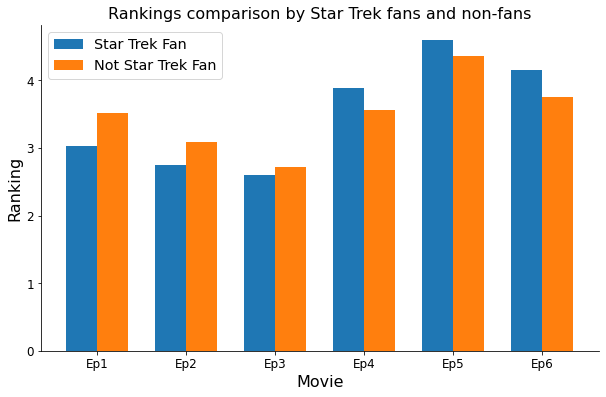

In [53]:
#Separating the data by the condition of being a Star Trek fan
fan_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']==True]
notfan_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']==False]

#Obtaining the mean rank for each movie
fan_trek_popular = fan_trek[fan_trek.columns[9:15]].mean()
notfan_trek_popular = notfan_trek[notfan_trek.columns[9:15]].mean()

dual_barplot(fan_trek_popular, 'Star Trek Fan', notfan_trek_popular, 'Not Star Trek Fan', 'Movie', 'Ranking',
             'Rankings comparison by Star Trek fans and non-fans', labels)

The tendency to rank higher the original trilogy prevails in this analysis, but we can see that people that are not fans of Star Trek ranked higher every movie of the prequel trilogy than Star Trek fans.

This results are suspiciously similar to the **Popularity comparison by gender**, so it leads us to believe that being a Star Trek fan is directly correlated with the gender of the respondent i.e. the majority of women are not Star Trek fans and the majority of men are Star Trek fans. Lets analyze the data further to confirm our observation.

In [14]:
print('According to the data there are {0} Star Trek male fans against {1} females fans'.format(fan_trek['Gender'].value_counts()[0], fan_trek['Gender'].value_counts()[1]))
print('According to the data there are {0} Star Trek male non fans against {1} females non fans'.format(notfan_trek['Gender'].value_counts()[1], notfan_trek['Gender'].value_counts()[0]))

According to the data there are 236 Star Trek male fans against 187 females fans
According to the data there are 261 Star Trek male non fans against 362 females non fans


As we predicted, there are more male Star Trek fans than female fans, and vice-versa. This relationship within the data adds bias to the result of the **Taste comparison between Star Trek and non Star Trek fans** analysis, making it very similar to the **Popularity comparison by gender**.

## Taste comparison between age groups

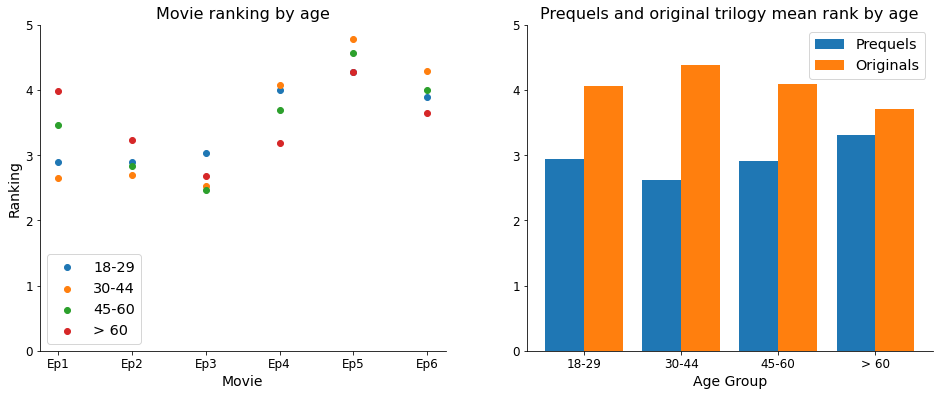

In [40]:
#Grouping the data by age
grouped_age = star_wars.groupby(by=['Age'], dropna=True)
rankings = list(star_wars.columns[9:15])
rankings_prequel = list(star_wars.columns[9:12])
rankings_original = list(star_wars.columns[12:15])

age_labels = ['18-29', '30-44', '45-60', '> 60']
movie_labels = ['Ep1', 'Ep2', 'Ep3', 'Ep4', 'Ep5', 'Ep6']
x = np.arange(len(age_labels))
width = 0.4

#Plotting using axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

i = 0
for label in age_labels:
    ax1.scatter(range(6), grouped_age[rankings].mean().iloc[i], label = label)
    i += 1
    
prequel_rank_list=[]
original_rank_list=[]
for age in age_labels:
    mean_ranking = grouped_age[rankings_prequel].mean().loc[age].mean()
    prequel_rank_list.append(mean_ranking)
    mean_ranking = grouped_age[rankings_original].mean().loc[age].mean()
    original_rank_list.append(mean_ranking)

ax2.bar(x - width/2, prequel_rank_list, width, label='Prequels')
ax2.bar(x + width/2, original_rank_list, width, label='Originals')

ax1.set_xticks(range(0,6))
ax1.set_xticklabels(movie_labels)
ax1.set_xlabel('Movie',size=14)
ax1.set_ylabel('Ranking',size=14)
ax1.set_title('Movie ranking by age',size=16)
ax1.legend(fontsize='x-large')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=12)
ax1.set_ylim([0,5])

ax2.set_xticks(range(0,4))
ax2.set_xticklabels(age_labels)
ax2.set_xlabel('Age Group',size=14)
ax2.set_title('Prequels and original trilogy mean rank by age', size=16)
ax2.legend(fontsize='x-large')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', labelsize=12)
ax2.set_ylim([0,5])

plt.show()

In the **Movie ranking by age** graph we see that for Episode 1, the > 60 age group liked it the most and the ones that disliked it the most were between 30 and 44 years old, this pattern repeats again for Episode 2. Episode 3 ranked the lowest within all 4 age groups, with the group 45 to 60 having the worst opinion and 18 to 29 having the best. The overall ranking for the prequel trilogy descended by every movie, with the two oldest age groups having the most different opinions at the start of the trilogy and at the end. The other two groups mantained the rankings somewhat stable within a range of 2.5 and 3.

With the original trilogy we observe that for the three movies the age group 30 to 44 gave the highest ranking for all three movies and the age group of over 60 has the lowest opinion of them all, with the two remaining age groups having an inbetween opinion from the two extremes groups.

The analysis of the first graph made us wonder which age group had the largest difference of opinion between each trilogy, this question is answered in the **Prequels and original trilogy mean rank by age**, where we see that the largest difference is attributed to the 30 to 44 age group, and the smallest difference to the over 60 age group. The two remaining age groups had a large, similar difference. 

To provide an explanation for the large difference of opinion that the 30 to 44 age group has, there should be more interdisciplinary testing, but we can make an assumption based on the age that these groups were first exposed to star wars. We're making the assumption that a large difference of opinion could be caused by the passion these movies generate on its fans. So, we could say that the most passionate age group would demonstrate the largest difference of opinion. 

But what causes this passion? If we take a look of the release dates of the Original Trilogy (1977, 1980, and 1983) the 30 to 44 age group had around 8 years for the first movie and 14 for the last movie. We could compare this phenomenom with modern sagas like Harry Potter, where being exposed to it at a young age increases the probability of becoming a passionate fan. This would also explain the overall indifference the oldest age group had with the movies, since at an older age it's more difficult to develop passion about mass consumed media. These are all arbitrary assumptions that need to be validated with more research.

## College and income analysis for Star Wars fans

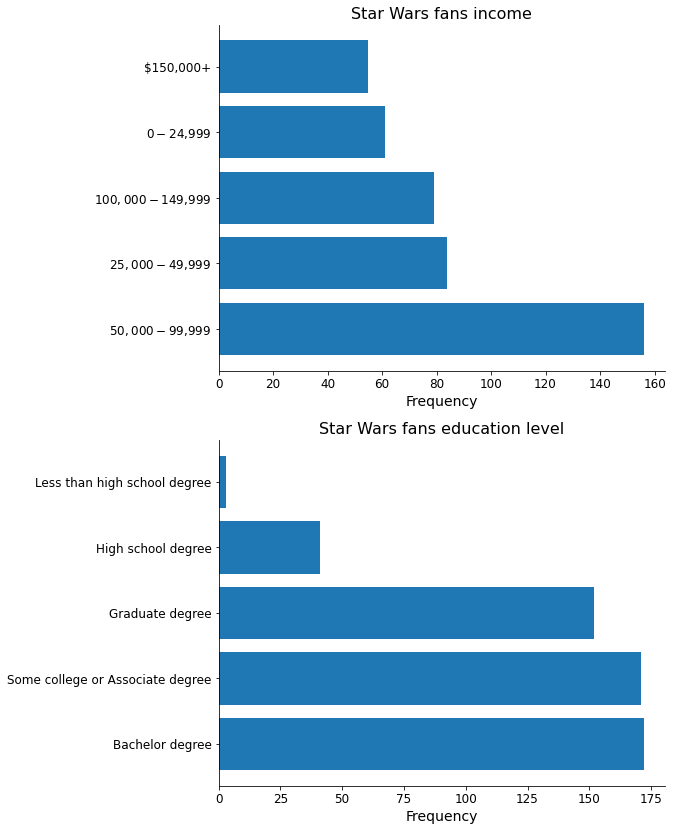

In [55]:
#Separating the data according to the condition of being a Star Wars fan
star_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,14))

ax1.barh(list(star_fans['Household Income'].value_counts().index), list(star_fans['Household Income'].value_counts().values))
ax1.tick_params(axis='both', labelsize=12)
ax1.set_title('Star Wars fans income', size=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Frequency',size=14)

ax2.barh(list(star_fans['Education'].value_counts().index), list(star_fans['Education'].value_counts().values))
ax2.tick_params(axis='both', labelsize=12)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Star Wars fans education level', size=16)
ax2.set_xlabel('Frequency',size=14)

plt.show()

As we see above, most Star Wars live in a household with an income of 50,000 - 99,000 and have at least a graduate degree. This tells us that most Star Wars fans belong to a middle class home.

## Conclusions

After analyzing the data we can reach some final conclusions:

- The most seen and most liked Star Wars movie is Episode V: The Empire Strikes Back.
- Star Wars is more popular with males than females.
- The Original Trilogy is universally seen as the better trilogy.
- The most extreme difference in rankings to the prequel and original trilogy was given by the respondents between 30 and 44 years old.
- Household income for most Star Wars fans was found to be between \\$50,000 and \\$99,000.
- Most Star Wars fans have at least a graduate degree.

According to our analysis and aknowledging the limitations present in the data, we can give a profile of the ideal Star Wars fan: Male, between 30 and 44 years old, graduated high school and obtained at least one graduate degree, and has an income of more than \\$50,000 and less than \$100,000